In [8]:
import numpy as np
import math
%matplotlib inline
#%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [9]:
# Переопределим операцию деления с остатком
def mod(a, b):
    res = a % b
    return res if res else b

# Дискретизация непрерывной функции
def discretize(data, num):
    data = data.astype(np.float32)
    data_min = data.min()
    delta = (data.max() - data_min) / num
    return ((data - data_min) / delta + 0.5).round().astype(int), delta, data_min

# Восстановление значений
def recover(discrete_values, delta, data_min):
    return discrete_values * delta + data_min

In [10]:
class CMAC:
    def __init__(self, ro, mu, dim):
        self.ro = ro
        self.dim = dim
        self.mu = np.array(mu)
        self.mem_size = self.mu.prod() * self.ro
        self.memory = np.zeros(self.mem_size)
    
    def get_active_cells(self, x):
        M = np.zeros([self.dim, self.ro])

        for d in range(self.dim):
            tmp = x[d]
            pos = mod(x[d], self.ro)
            for i in range(pos-1, self.ro):
                M[d, i] = tmp
                tmp += 1
            for i in range(pos-1):
                M[d, i] = tmp
                tmp += 1
        #print(M)        
        
        M = M.T
        v = np.zeros(self.ro)

        for i in range(self.ro):
            l = ([(M[i, 0]-1) * self.mu[1:].prod()] +
                 [ ((M[i, j]-1) // self.ro) * self.mu[j+1:].prod()
                   for j in range(1, self.dim) ])
            v[i] = sum(l) + 1
            
        return v
    
    def predict(self, x, return_active=False):
        idx = self.get_active_cells(x).astype(int)
        if return_active:
            return self.memory[idx].sum(), idx
        else:
            return self.memory[idx].sum()
    
    def train_step(self, x, y):
        y_pred, idx = self.predict(x, return_active=True)
        d_w = float(y - y_pred) / self.ro
        self.memory[idx] += d_w
        #self.memory[idx] += np.random.randint(-1, 1)
        
    def __len__(self):
        return self.mem_size

In [11]:
def train(net, x, y, epochs, step = -1):
    sz = len(y)
    
    if step != -1:
        for j in range(step):
            tmp = np.random.randint(0, sz)
            net.train_step(x[tmp], y[tmp])
    else:
        for epoch in range(epochs):
            for i in range(sz):
                net.train_step(x[i], y[i])

### Тестируем алгоритм для функции одной переменной

function


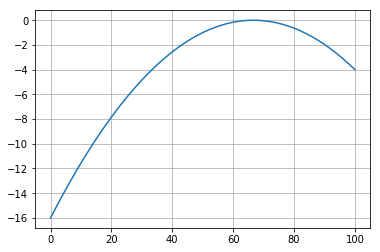

predict, iters =  10


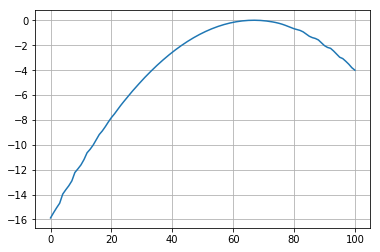

predict, iters =  1


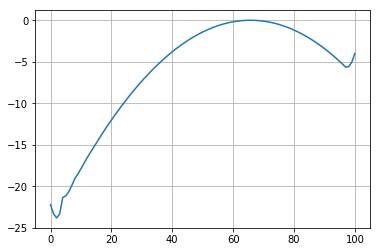

predict, iters =  40


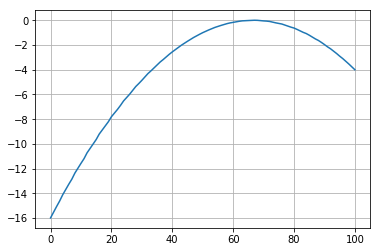

predict, iters =  100


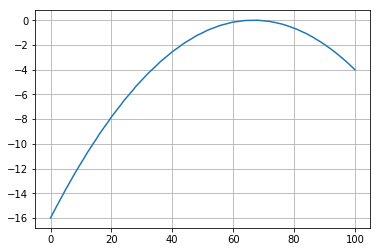

In [6]:
# Данные



x, d_x, x_min = discretize(np.linspace(-3, 3, 500), 100)
x = x.reshape(-1, 1)

x_r = recover(x, d_x, x_min)
y = -x_r ** 2 + 2 * x_r - 1

xmax = x.max()

# Гиперпараметры
ro = 4
k = math.ceil(float(xmax - 1) / ro) + 1
mu = [k]
dim = 1


print("function")
plt.plot(x, y)
plt.grid(True)
plt.show()

# Сеть
n_iter = 10
cmac = CMAC(ro, mu, dim)
train(cmac, x, y, n_iter)

y_pred = np.array([cmac.predict(x1) for x1 in x])

print("predict, iters = ", n_iter)
plt.plot(x, y_pred)
plt.grid(True)
plt.show()


n_iter = 20
cmac = CMAC(ro, mu, dim)
train(cmac, x, y, n_iter)

y_pred = np.array([cmac.predict(x1) for x1 in x])

print("predict, iters = ", n_iter)
plt.plot(x, y_pred)
plt.grid(True)
plt.show()

n_iter = 40
cmac = CMAC(ro, mu, dim)
train(cmac, x, y, n_iter)

y_pred = np.array([cmac.predict(x1) for x1 in x])

print("predict, iters = ", n_iter)
plt.plot(x, y_pred)
plt.grid(True)
plt.show()

n_iter = 100
cmac = CMAC(ro, mu, dim)
train(cmac, x, y, n_iter)

y_pred = np.array([cmac.predict(x1) for x1 in x])

print("predict, iters = ", n_iter)
plt.plot(x, y_pred)
plt.grid(True)
plt.show()

predict, iters =  0


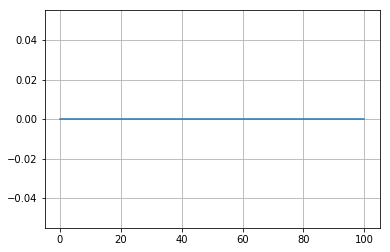

predict, iters =  1


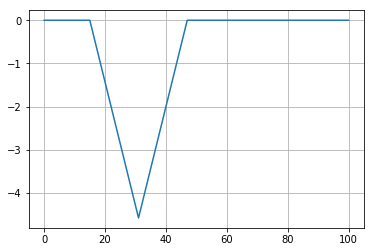

predict, iters =  2


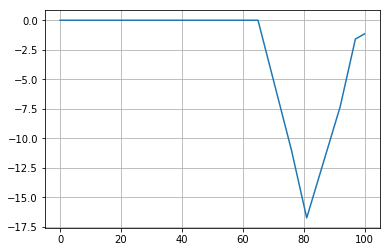

predict, iters =  3


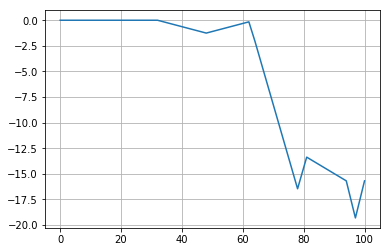

predict, iters =  4


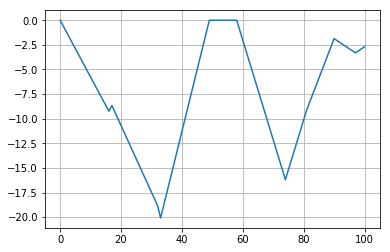

predict, iters =  5


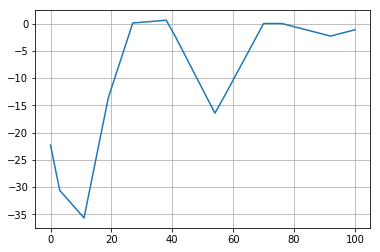

predict, iters =  6


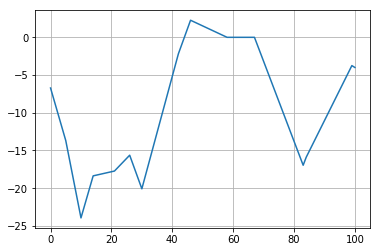

predict, iters =  7


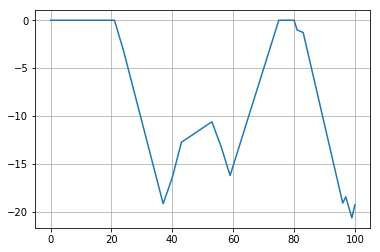

predict, iters =  8


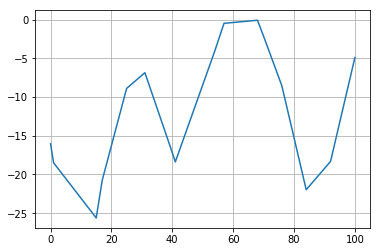

predict, iters =  9


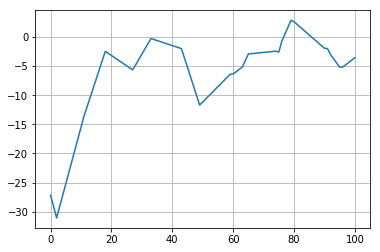

In [48]:
n_iter = 1
ro = 16
k = math.ceil(float(xmax - 1) / ro) + 1
mu = [k]
dim = 1
for i in range(10):
    cmac = CMAC(ro, mu, dim)

    train(cmac, x, y, n_iter, i)

    y_pred = np.array([cmac.predict(x1) for x1 in x])

    print("predict, iters = ", i)
    plt.plot(x, y_pred)
    plt.grid(True)
    plt.show()

### Функция двух переменных

1.0823307296746874
0.3384917051525071
0.15554790789680076
0.08865824465630065


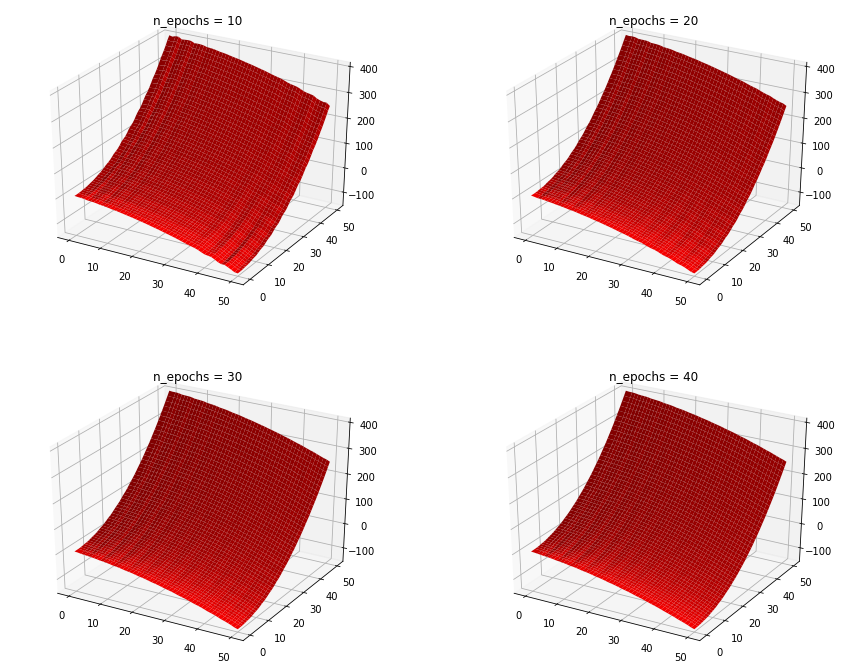

In [12]:
# Данные
n_epochs = 10
n_intervals = 50

x_raw = np.linspace(0, 10, 100)
x, d_x, x_min = discretize(x_raw, n_intervals)
y_raw = np.linspace(0, 10, 100)
y, d_y, y_min = discretize(y_raw, n_intervals)

X, Y = np.tile(x, (y.shape[0], 1)).T, np.tile(y, (x.shape[0], 1))

data = [(X[i, j], Y[i, j]) for i in range(x.shape[0])
                           for j in range(y.shape[0])]
#x^2 - 5y - 4y^2 + 5
Z = -recover(X, d_x, x_min) ** 2 - 5 * recover(X, d_x, x_min) + 4 * recover(Y, d_y, y_min) **2 + 5

# Гиперпараметры
ro = 4
mu = [x.max(), y.max()]
mu = np.array(list(map(math.ceil,
                       [ float(a - 1) / ro for a in mu ]))) + 1
dim = 2

# Обучаем сеть
fig = plt.figure(figsize=(15, 12))

cmac = CMAC(ro, mu, dim)
ax = None

for i in range(4):
    train(cmac, data, Z.reshape(-1), n_epochs)
    ax = fig.add_subplot('22{}'.format(i+1), projection='3d')
    Z_pred = np.array([ cmac.predict(x1) for x1 in data ])
    Z_pred = Z_pred.reshape(x.shape[0], y.shape[0])
    ax.plot_surface(X, Y, Z_pred, color='red')
    plt.title('n_epochs = {}'.format((i+1) * n_epochs))
    print(np.mean((Z - Z_pred) ** 2))
plt.show()
ax.plot_surface(X, Y, Z, color='blue');
#plt.plot_surface(X, Y, Z, color="blue")

### Базисные функции

23530.32957072001


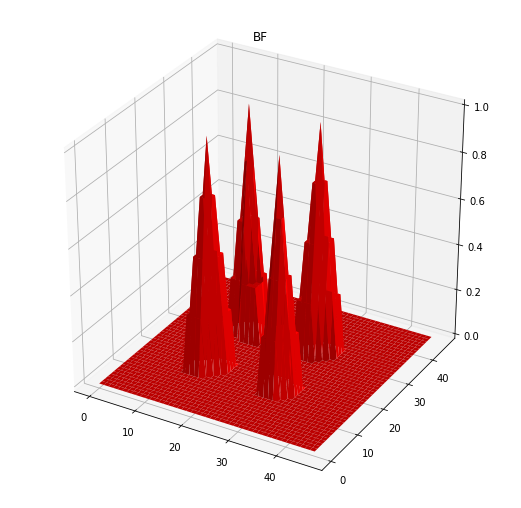

In [32]:
n_intervals = 45

x_raw = np.linspace(0, 10, 100)
x, d_x, x_min = discretize(x_raw, n_intervals)
y_raw = np.linspace(0, 10, 100)
y, d_y, y_min = discretize(y_raw, n_intervals)

X, Y = np.tile(x, (y.shape[0], 1)).T, np.tile(y, (x.shape[0], 1))

data = [(X[i, j], Y[i, j]) for i in range(x.shape[0])
                           for j in range(y.shape[0])]

# Гиперпараметры
ro = 4
mu = [x.max(), y.max()]
mu = np.array(list(map(math.ceil,
                       [ float(a - 1) / ro for a in mu ]))) + 1
dim = 2

# Обучаем сеть

cmac = CMAC(ro, mu, dim)
cmac.train_step([15,15], ro)
cmac.train_step([30,15], ro)
cmac.train_step([15,30], ro)
cmac.train_step([30,30], ro)

ax = None
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot('22{}'.format(1), projection='3d')
Z_pred = np.array([ cmac.predict(x1) for x1 in data ])
Z_pred = Z_pred.reshape(x.shape[0], y.shape[0])
ax.plot_surface(X, Y, Z_pred/ro,  color='red')
plt.title('BF')
print(np.mean((Z - Z_pred) ** 2))

### Выброс для функции с разрывом

0.000278903902510024
0.000239311327988369
0.00022853884803345035
0.0002238031772799867


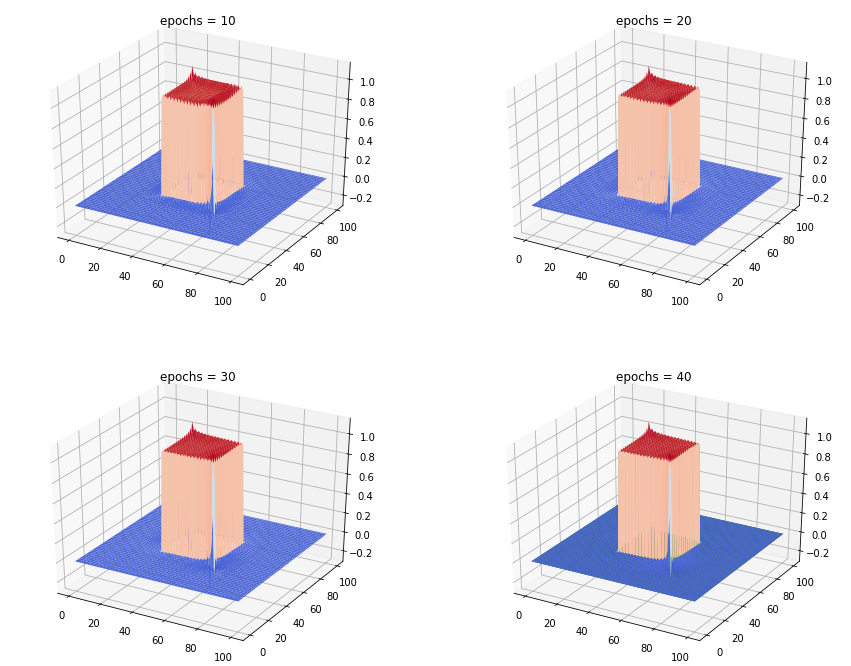

In [58]:
# Данные
n_epochs = 10
n_intervals = 100

x_raw = np.linspace(0, 20, 100)
x, d_x, x_min = discretize(x_raw, n_intervals)
y_raw = np.linspace(0, 10, 100)
y, d_y, y_min = discretize(y_raw, n_intervals)

X, Y = np.tile(x, (y.shape[0], 1)).T, np.tile(y, (x.shape[0], 1))

data = [(X[i, j], Y[i, j]) for i in range(x.shape[0])
                           for j in range(y.shape[0])]

Z = np.zeros_like(Y)
Z[X>33] = 1
Z[Y>33] = 1
Z[X>66] = 0
Z[Y>66] = 0
Z[X<34] = 0
Z[Y<34] = 0

# Гиперпараметры
ro = 2
mu = [x.max(), y.max()]
mu = np.array(list(map(math.ceil,
                       [ float(a - 1) / ro for a in mu ]))) + 1
dim = 2

# Обучаем сеть
fig = plt.figure(figsize=(15, 12))

cmac = CMAC(ro, mu, dim)
ax = None

for i in range(4):
    train(cmac, data, Z.reshape(-1), n_epochs)
    ax = fig.add_subplot('22{}'.format(i+1), projection='3d')
    Z_pred = np.array([ cmac.predict(x1) for x1 in data ])
    Z_pred = Z_pred.reshape(x.shape[0], y.shape[0])
    ax.plot_surface(X, Y, Z_pred, cmap = cm.coolwarm, color='red')
    plt.title('epochs = {}'.format((i+1) * n_epochs))
    print(np.mean((Z - Z_pred) ** 2))

ax.plot_surface(X, Y, Z, color='green');

In [59]:
Добавить разрывы сбоку

SyntaxError: invalid syntax (<ipython-input-59-0fbaee6775bc>, line 1)

In [ ]:
калман, винер, 